In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [44]:
# !pip install nltk

In [5]:
df=pd.read_csv("movie.csv")

In [6]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [7]:
print(df.loc[3]['review'])

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.


In [8]:

df["sentiment"] = df["sentiment"].str.strip()
# Convert sentiment to numerical values and rename the column to 'label'
df = df.rename(columns={"sentiment": "label"})
df["label"] = df["label"].map({"positive": 1, "negative": 0})

# Fill NaN values with a default (optional, based on data)
df = df.dropna(subset=["label"])  # This removes rows where sentiment mapping failed

# Save the updated dataset
df.to_csv("movie_label.csv", index=False)

In [9]:

df=pd.read_csv("movie_label.csv")

In [10]:
df.head()

review  label
0  One of the other reviewers has mentioned that ...      1
1  A wonderful little production. <br /><br />The...      1
2  I thought this was a wonderful way to spend ti...      1
3  Basically there's a family where a little boy ...      0
4  Petter Mattei's "Love in the Time of Money" is...      1

In [11]:
df.shape

(50000, 2)

In [12]:
data=df.iloc[:10000:]

In [14]:
data.shape

(10000, 2)

## working with Label

In [15]:
data['label'].value_counts()

label
1    5028
0    4972
Name: count, dtype: int64

<Axes: xlabel='label'>

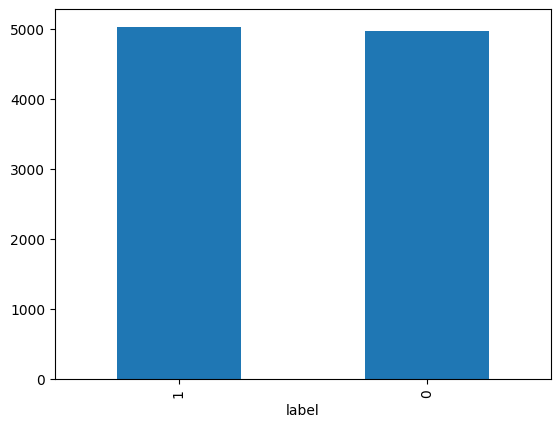

In [16]:
data['label'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

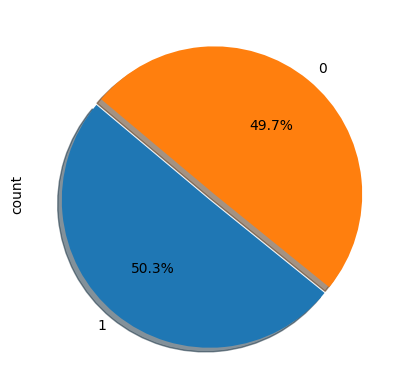

In [36]:
data['label'].value_counts().plot.pie(autopct='%1.1 f%%', shadow=True, startangle=140, explode=(0.05, 0))

## working with Reviews

In [61]:
#cleaning text
# Ensure stopwords are downloaded
nltk.download('stopwords')

# Load stopwords once to avoid redundant calls
stopwords_set = set(stopwords.words('english'))

# Regex pattern for basic emojis
emoji_pattern = re.compile(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]*>', '', text).lower()
    
    # Extract emojis separately
    emojis = ' '.join(emoji_pattern.findall(text)).replace('-', '')

    # Remove special characters (except emojis which were extracted)
    text = re.sub(r'\W+', ' ', text) + ' ' + emojis

    # Initialize the stemmer
    porter = PorterStemmer()

    # Tokenize, remove stopwords, and apply stemming
    text = [porter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)


[nltk_data] Downloading package stopwords to /home/rgukt-
[nltk_data]     basar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
# Example Usage
sample_text = "Running <b>fast</b>! 😊 This is a test message with emojis :-)"
print(preprocessing(sample_text))


run fast test messag emoji :)


In [63]:
data['review']=data['review'].apply(lambda x:preprocessing(x))

/tmp/ipykernel_6254/4211089753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review']=data['review'].apply(lambda x:preprocessing(x))


In [64]:
data['review']

0       one review mention watch 1 oz episod hook righ...
1       wonder littl product film techniqu unassum old...
2       thought wonder way spend time hot summer weeke...
3       basic famili littl boy jake think zombi closet...
4       petter mattei love time money visual stun film...
                              ...                        
9995    fun entertain movi wwii german spi juli andrew...
9996    give break anyon say good hockey movi know mov...
9997    movi bad movi watch endless seri bad horror mo...
9998    movi probabl made entertain middl school earli...
9999    smash film film make show intens strang relati...
Name: review, Length: 10000, dtype: object

## Visualizing Negative and Positive Words


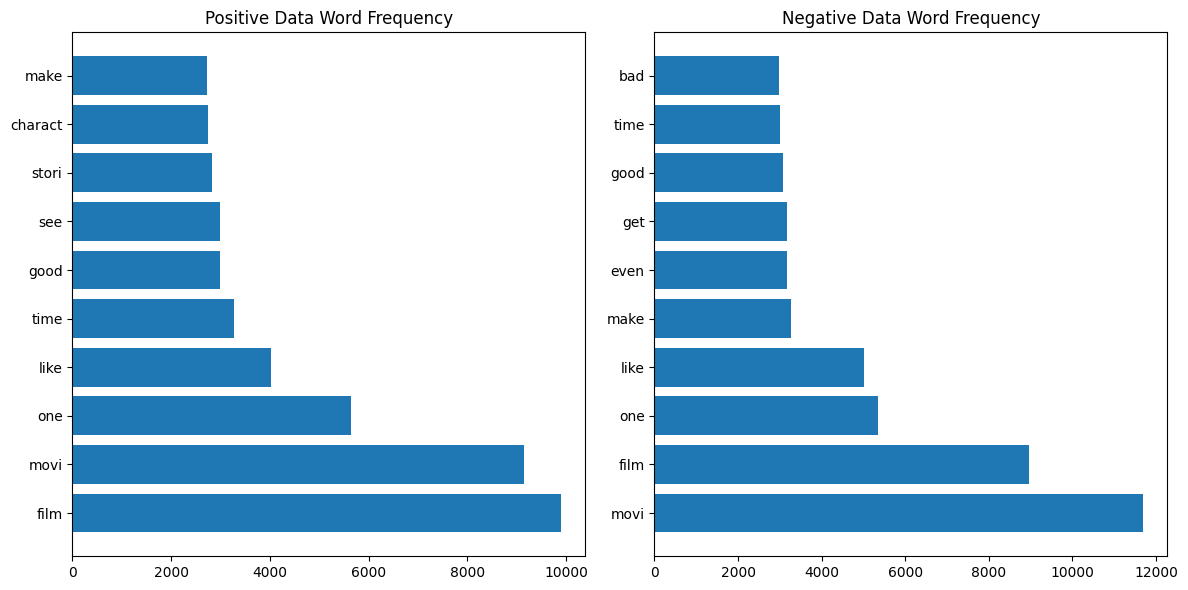

In [67]:
positivedata = data[data['label'] == 1]
positivedata = positivedata['review']
negdata = data[data['label'] == 0]
negdata = negdata['review']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()


##  TF-IDF Vertorizer to convert the raw documents into feature matrix

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.review)

In [73]:
tfidf.vocabulary_

{'one': 22868,
 'review': 26682,
 'mention': 20452,
 'watch': 34885,
 'oz': 23330,
 'episod': 10595,
 'hook': 15191,
 'right': 26821,
 'exactli': 10879,
 'happen': 14289,
 'first': 11709,
 'thing': 32026,
 'struck': 30717,
 'brutal': 4718,
 'unflinch': 33537,
 'scene': 27877,
 'violenc': 34480,
 'set': 28438,
 'word': 35611,
 'go': 13279,
 'trust': 32921,
 'show': 28848,
 'faint': 11139,
 'heart': 14559,
 'timid': 32241,
 'pull': 25425,
 'punch': 25445,
 'regard': 26282,
 'drug': 9691,
 'sex': 28479,
 'hardcor': 14315,
 'classic': 6434,
 'use': 33983,
 'call': 5156,
 'nicknam': 22180,
 'given': 13147,
 'oswald': 23082,
 'maximum': 20049,
 'secur': 28229,
 'state': 30318,
 'penitentari': 23930,
 'focus': 11972,
 'mainli': 19480,
 'emerald': 10349,
 'citi': 6372,
 'experiment': 10979,
 'section': 28225,
 'prison': 25121,
 'cell': 5706,
 'glass': 13176,
 'front': 12401,
 'face': 11099,
 'inward': 16347,
 'privaci': 25126,
 'high': 14885,
 'agenda': 1098,
 'em': 10314,
 'home': 15122,
 'ma

## Training Machine Learning Model for Sentiment Analysis

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [82]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        36296     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  6.48104D-03


ITERATION     1

---------------- CAUCHY entered-------------------
 There are            0   breakpoints 

 GCP found in this segment
Piece      1 --f1, f2 at start point  -4.4946D-04  4.4946D-04
Distance to the stationary point =   1.0000D+00

---------------- exit CAUCHY----------------------

       36296  variables are free at GCP            1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        36296     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  6.35949D-03


ITERATION     1

---------------- CAUCHY entered-------------------
 There are            0   breakpoints 

 GCP found in this segment
Piece      1 --f1, f2 at start point  -4.4966D-04  4

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

 This 

 LINE SEARCH           0  times; norm of step =    5.4948312306725420     

At iterate    9    f=  4.31950D-02    |proj g|=  2.22091D-04
 LINE SEARCH           1  times; norm of step =   0.63456951566543862     

At iterate   13    f=  3.36177D-01    |proj g|=  7.82706D-03


ITERATION    10


ITERATION    14

----------------SUBSM entered-----------------


----------------SUBSM entered-----------------


----------------exit SUBSM --------------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    1.0860602439966436     

At iterate   14    f=  3.35718D-01    |proj g|=  3.67865D-03
 LINE SEARCH           0  times; norm of step =    1.7232798645337506     

At iterate   10    f=  4.30949D-02    |proj g|=  1.34339D-04


ITERATION    15


ITERATION    11

----------------SUBSM entered-----------------


----------------SUBSM entered-----------------


----------------exit SUBSM --------------------


----------------exit SUBSM ------

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    2.4988434530796568     

At iterate    7    f=  1.61270D-01    |proj g|=  2.71873D-03


ITERATION     8

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    3.5753493616384611     

At iterate    8    f=  1.60008D-01    |proj g|=  5.21602D-03


ITERATION     9

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    5.2385417413375492     

At iterate    9    f=  1.57307D-01    |proj g|=  7.89374D-03


ITERATION    10

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           0  times; norm of step =    5.3746111834241601     

At iterate   10    f=  1.53494D-01    |proj g|=  8.65789D-03




 This problem is unconstrained.
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.8s finished


+00
      0.0000D+00 -1.4193D-01  0.0000D+00  0.0000D+00 -4.7880D-01  1.3130D+00
      5.0600D-01 -2.4323D-01  1.8148D-01  0.0000D+00  1.2029D+00  3.1906D+00
     -3.3770D+00  0.0000D+00  0.0000D+00 -3.1486D+00 -1.1740D+00  4.1311D-01
     -4.9168D-01 -6.0856D-01  0.0000D+00 -2.1885D+00  0.0000D+00  5.4895D-01
      5.5285D-01  3.0678D+00 -3.3655D-01  0.0000D+00 -4.6844D-01  5.8266D-02
      9.1064D-02 -1.2284D+00  3.9064D-01  2.1199D-01 -1.3352D-02 -1.4743D-01
      1.1754D+00  0.0000D+00  0.0000D+00  1.4568D-01  0.0000D+00  1.2042D-01
     -7.7315D-01 -3.4993D-01  0.0000D+00  5.5743D-01 -5.0051D-01  0.0000D+00
      0.0000D+00  0.0000D+00  2.4735D+00 -1.7467D+00  0.0000D+00 -6.8677D-02
      2.2245D-01  5.4988D-01  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
     -1.5074D+00  1.3610D+00  5.4127D-01  0.0000D+00  1.0916D+00  0.0000D+00
      0.0000D+00  7.7856D-01  0.0000D+00 -6.0625D-01  1.7260D-01  1.5975D+00
      0.0000D+00 -1.6197D-01  0.0000D+00  1.1594D+00 -1.2154D+00  0.0000

 This problem is unconstrained.


In [84]:
from sklearn import metrics

print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.873


## Pickle files

### pickle is used for saving (serializing) and loading (deserializing) objects in Python. It allows you to store trained models, data structures, and objects for later use without retraining or recomputation.pickle is used for saving (serializing) and loading (deserializing) objects in Python. It allows you to store trained models, data structures, and objects for later use without retraining or recomputation.

In [90]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

## prediction

In [95]:
def prediction(review):
    preprocessed_review=preprocessing(review)
    review_list=[preprocessed_review]
    review_vector=tfidf.transform(review_list)
    prediction=clf.predict(review_vector)[0]
    return prediction

In [119]:
review="movie is good"
result=prediction(review)
if result==1:
    print("positive review")
else:
    print("negative review")

positive review
